<div style="padding: 20px;border-radius: 16px;background-color: #fc0303;
background-image: linear-gradient(225deg, #fcba03 50%, #fcd303 20%, #fc6b03 10%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Swiggy Restaurants Dataset</h4>
    </div>

# About Dataset
Swiggy's dataset, gathered using Selenium in Python over 2 months in 2024, features details from 1.5 Lakh+ restaurants across different parts of India. It includes restaurant names, ratings, cuisine, average price, number of offers, offer name, area, pure veg and geographic locations. The focus is on the top 600 cities, offering a snapshot of the diverse culinary landscape during this period. Ideal for researchers, analysts, and enthusiasts exploring culinary trends, safety impact on user preferences, or conducting geographical studies. Ethically gathered and compliant with Swiggy's terms of service.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
#Reading the CSV file with pandas
df = pd.read_csv('swiggy_file.csv')

In [3]:
#Checking the columns in the dataset
df.columns

Index(['Restaurant Name', 'Cuisine', 'Rating', 'Number of Ratings',
       'Average Price', 'Number of Offers', 'Offer Name', 'Area', 'Pure Veg',
       'Location'],
      dtype='object')

In [10]:
#Let's get a look at the dataset
df.head() 

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar


In [11]:
#What are the info(e.g. column types, memory allocation size) of this dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


<div style="padding: 20px;border-radius: 16px;background-color: #fc0303;
background-image: linear-gradient(225deg, #fcba03 50%, #fcd303 20%, #fc6b03 10%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Data Cleaning</h4>
    </div>

## Cleaning the Swiggy dataset is crucial for accurate and valuable insights. Imagine navigating a city with wrong street signs! Here's why cleaning matters:

**1. Dirty Data Leads to Wrong Turns:** Typos, missing values, and inconsistencies mislead you. Like a bad map, they distort trends and hide patterns.

**2. Outliers and Biases Block the Path:** Extreme values and slanted data skew results. Imagine a map showing only tourist spots, ignoring the rest of the city.

**3. Clean Data Saves Time and Resources:** Less data to process means faster analysis and fewer errors. You wouldn't waste time deciphering a messy map, right?

**4. Accurate Models Make Better Guides:** Machine learning models trained on clean data make reliable predictions, like a trustworthy map guiding you to the right places.

Investing in cleaning upfront ensures your Swiggy analysis reveals clear and actionable insights, just like having a clear map helps you navigate a new city confidently.

In [12]:
# Convert 'Too Few Ratings' to 0 in 'Number of Ratings'
df['Number of Ratings'] = df['Number of Ratings'].replace('Too Few Ratings', '0')

# Extract numeric value from 'Average Price' and convert to integer
df['Average Price'] = df['Average Price'].str.extract('(\d+)').fillna(0).astype(int)

# Convert '-' to 0 in 'Rating'
df['Rating'] = df['Rating'].replace('-', '0')

# Remove everything after '+' in 'Number of Ratings'
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\+.*', '', regex=True)
# Remove non-digits from 'Number of Ratings'
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\D', '', regex=True)

# Replace newlines with commas in 'Offer Name'
df['Offer Name'] = df['Offer Name'].str.replace('\n', ',')

In [13]:
df.head()

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10,250,2,"FLAT DEAL,FLAT ₹125 OFF,USE FLAT125ABOVE ₹699,...",LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50,250,2,"30% OFF UPTO ₹75,USE TRYNEWABOVE ₹149, FLAT ₹1...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10,200,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8,49,5,"50% OFF UPTO ₹100,USE TRYNEWABOVE ₹129, FLAT D...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100,200,2,"DEAL OF DAY,10% OFF UPTO ₹40,USE STEALDEALABOV...",Circular Road,No,Abohar


<div style="padding: 20px;border-radius: 16px;background-color: #fc0303;
background-image: linear-gradient(225deg, #fcba03 50%, #fcd303 20%, #fc6b03 10%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Exploratory Data Analysis (EDA)</h4>
    </div>



### What is the proportion of pure vegetarian restaurants compared to non-vegetarian restaurants?
--- 
This question can be answered by looking at the `Count` column in the `pure_veg_counts` DataFrame. The `Count` column shows the number of restaurants in each category (`Pure Veg` and `No`). By calculating the proportion of pure vegetarian restaurants, we can get a sense of how common they are in the dataset.


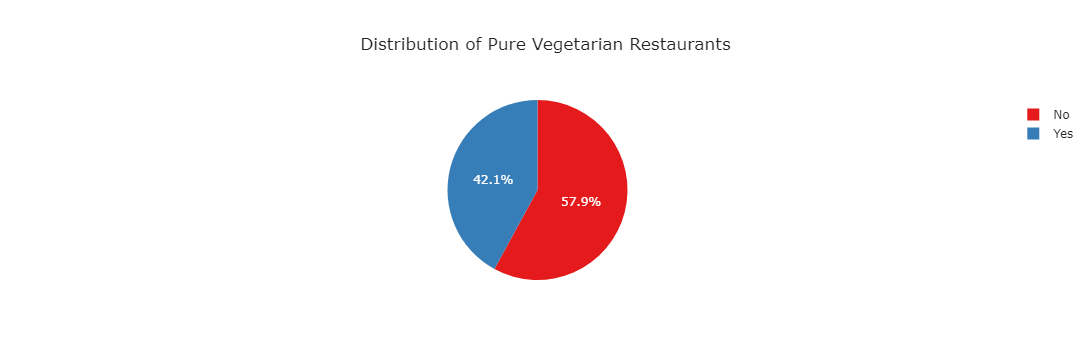

In [19]:
pure_veg_counts = df['Pure Veg'].value_counts().reset_index()
pure_veg_counts.columns = ['Pure Veg', 'Count']

# Plot a pie chart
fig = px.pie(
    pure_veg_counts,
    names='Pure Veg',
    values='Count',
    title='Distribution of Pure Vegetarian Restaurants',
    color_discrete_sequence=px.colors.qualitative.Set1,
    template='seaborn'
)

fig.show()

---  
<br>

- ### What is the distribution of restaurant ratings across three categories: below 3, between 3 and 4, and above 4?



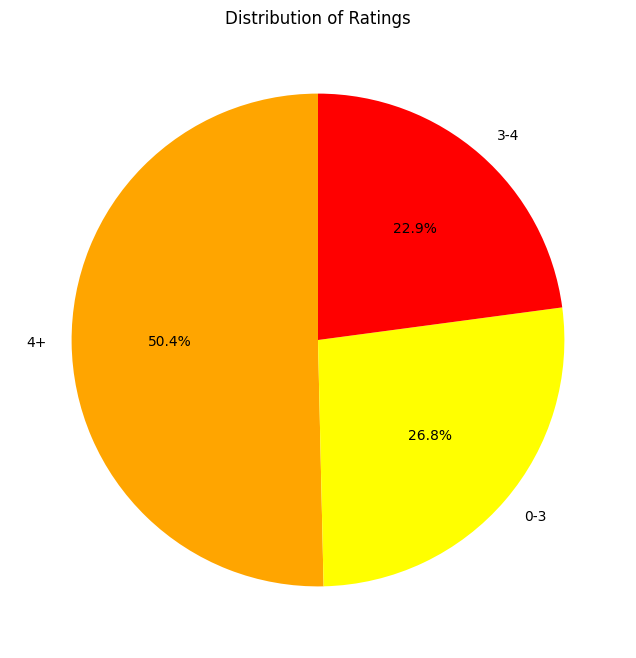

In [22]:
import matplotlib.pyplot as plt

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating Category'] = df['Rating'].apply(lambda x: '0-3' if pd.isna(x) or x < 3 else ('3-4' if x < 4 else '4+'))
rating_counts = df['Rating Category'].value_counts()
colors = ['orange', 'yellow', 'red']

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Ratings')
plt.show()


--- 
<br>

- ### How is the average price of restaurants distributed across different price ranges?

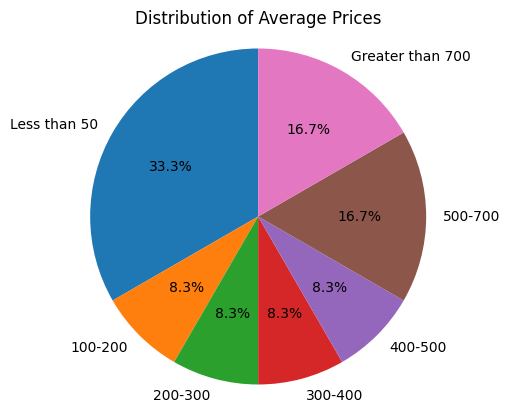

In [17]:
#After getting the unique prices, we can divide them into different categories
unique_prices = [50, 100, 150, 200, 250, 300, 500, 400, 350, 450, 40, 0, 550, 48, 1, 600, 32, 900, 750, 800, 650, 10, 12, 850, 2]

# Define the price ranges
price_ranges = {
    'Less than 50': lambda x: x < 50,
    '100-200': lambda x: 100 <= x < 200,
    '200-300': lambda x: 200 <= x < 300,   
    '300-400': lambda x: 300 <= x < 400,
    '400-500': lambda x: 400 <= x < 500,
    '500-700': lambda x: 500 <= x < 700,
    'Greater than 700': lambda x: x > 700
}

# Count the occurrences in each price range
price_counts = {range_name: sum(price_range(price) for price in unique_prices) for range_name, price_range in price_ranges.items()}


labels = price_counts.keys()
sizes = price_counts.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  

plt.title('Distribution of Average Prices')
plt.show()


---
<br>

- ### What are the 15 most frequent offered by restaurants in the dataset?

In [23]:
#To find all possible Cuisine in the dataset
cuisine_column = df['Cuisine']

all_cuisines = [cuisine.split(', ') for cuisine in cuisine_column if pd.notna(cuisine)]
unique_cuisines = set([c for sublist in all_cuisines for c in sublist])

print("All Possible Cuisines:", unique_cuisines)


All Possible Cuisines: {'Mughlai', 'Bangladeshi', 'British', 'Fast Food', 'Discount offer from Garden Cafe Express Kankurgachi', 'Waffle', 'American', 'Persian', 'Chaat', 'Barbecue', 'Combo', 'Tibetan', 'Sindhi', 'Chinese', 'Bengali', 'indian', 'Burgers', 'SVANidhi Street Food Vendor', 'Awadhi', 'chinese', 'Thalis', 'Japanese', 'Bubble Tea', 'Oriental', 'Malaysian', 'Kashmiri', 'Bhutanese', 'North Eastern', 'European', 'Salads', 'Burmese', 'Naga', 'Biryani', 'Tribal', 'Pastas', 'Cakes and Pastries', 'South American', 'Nepalese', 'To Avail This Use Code AZAD105', 'North indian', 'Desserts', 'Continental', 'Mexican', 'Popular Brand Store', 'Pan-Asian', 'Asian', 'Andhra', 'Rajasthani', 'Korean', 'Free Delivery ! Limited Stocks!', 'Special Discount from (The Scoop)', 'Default', 'Singaporean', 'Rs.40 Off', 'Jain', 'Grill', 'Momos', 'Juices', 'Maharashtrian', 'Oriya', 'Parsi', 'Ice Cream Cakes', 'Indonesian', 'Gujarati', 'Konkan', 'Turkish', 'Italian-American', 'North Indian,', 'Arabian', 'B

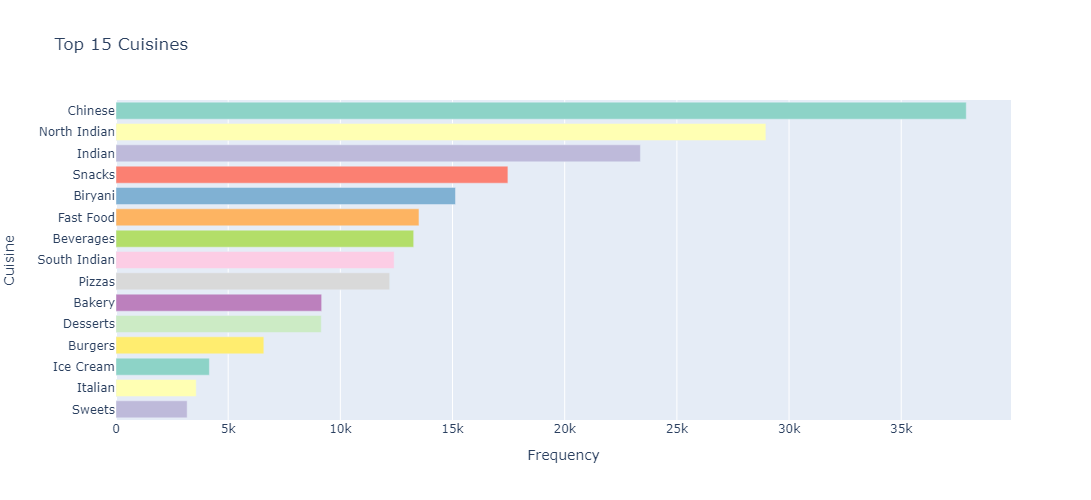

In [19]:
import pandas as pd
import plotly.express as px

cuisine_counts = df['Cuisine'].str.split(', ').explode().value_counts()
top_15_cuisines = cuisine_counts.head(15)
plot_data = pd.DataFrame({'Cuisine': top_15_cuisines.index, 'Frequency': top_15_cuisines.values})
colors = px.colors.qualitative.Set3

fig = px.bar(plot_data, x='Frequency', y='Cuisine', color='Cuisine',
             color_discrete_sequence=colors,
             orientation='h', labels={'Frequency': 'Frequency'},
             title='Top 15 Cuisines', width=800, height=500)

fig.update_layout(showlegend=False)  
fig.show()


-  ### What are the most prominent cuisines offered by restaurants in the dataset based on their frequency in the "Cuisine" column?

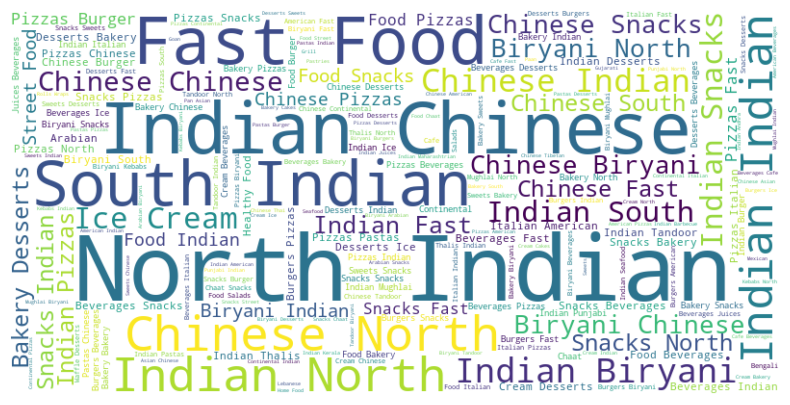

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cuisine_text = ','.join(df['Cuisine'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


---
<br>

### Is there a relationship between the average price of restaurants and their overall rating? If so, what is the nature of this relationship?

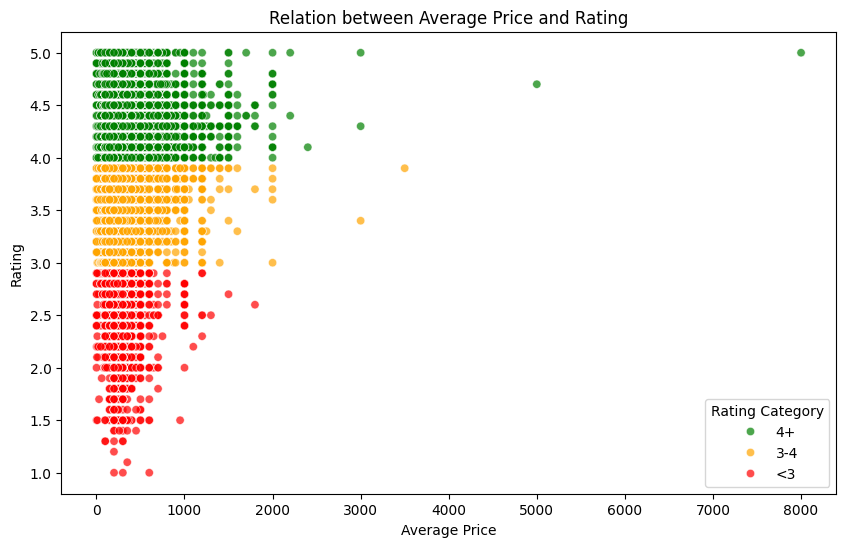

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

average_price = df['Average Price']
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Define rating categories
def categorize_rating(rating):
    if rating < 3:
        return '<3'
    elif 3 <= rating < 4:
        return '3-4'
    else:
        return '4+'

df['Rating Category'] = df['Rating'].apply(categorize_rating)

# Define a color palette for each category
palette = {'<3': 'red', '3-4': 'orange', '4+': 'green'}

plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_price, y=df['Rating'], hue=df['Rating Category'], palette=palette, alpha=0.7)
plt.title('Relation between Average Price and Rating')
plt.xlabel('Average Price')
plt.ylabel('Rating')
plt.legend(title='Rating Category')
plt.show()


---
<br>

- ### How are restaurants distributed across different locations?

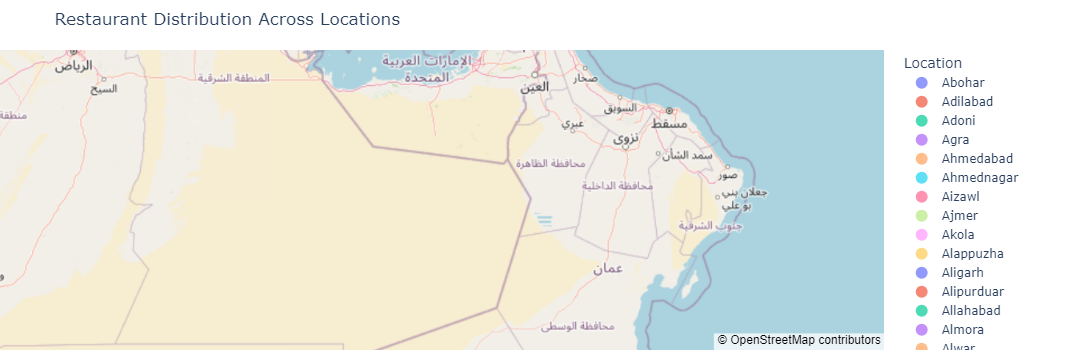

In [22]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import ArcGIS


df = df[df['Location'] != '-']
restaurant_count = df.groupby("Location")["Restaurant Name"].count().reset_index(name='count')

nom = ArcGIS()
restaurant_count[["Lat", "Long"]] = restaurant_count['Location'].apply(lambda x: nom.geocode(x)[1]).apply(pd.Series)

fig = px.scatter_mapbox(
    restaurant_count,
    lon='Long',
    lat='Lat',
    zoom=3,
    color='Location',
    size='count',
    title='Restaurant Distribution Across Locations',
    mapbox_style='open-street-map',
)

fig.update_layout(margin={"r": 0, 't': 50, 'l': 0, 'b': 10})
fig.show()


---
<br>

- ### Where are the areas with the highest concentration of restaurants in India?

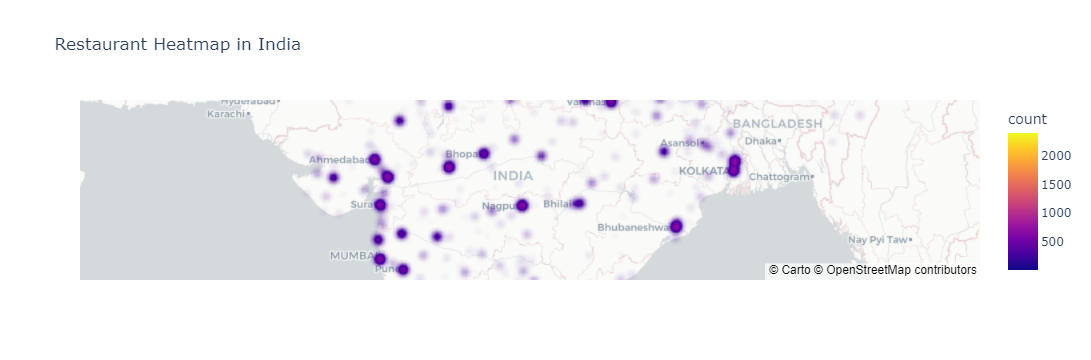

In [23]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import ArcGIS

# Assuming your data is in a DataFrame named 'df'
# Replace 'Location' with the actual column name from your dataset

# Filter out rows with '-' location (if applicable)
df = df[df['Location'] != '-']

# Group by Location and get the count of restaurants
restaurant_count = df.groupby("Location")["Restaurant Name"].count().reset_index(name='count')

# Geocode locations using ArcGIS
nom = ArcGIS()
restaurant_count[["Lat", "Long"]] = restaurant_count['Location'].apply(lambda x: nom.geocode(x)[1]).apply(pd.Series)

# Create a heatmap on Mapbox
fig = px.density_mapbox(
    restaurant_count.dropna(subset=['Lat', 'Long']),
    lat='Lat',
    lon='Long',
    z='count',
    radius=10,  # Adjust the radius as needed
    zoom=4,
    mapbox_style="carto-positron",  # You can try other mapbox styles
    title='Restaurant Heatmap in India',
)

# Show the plot
fig.show()
